
---
## Step 0: Load The Data

In [103]:
import pickle
import matplotlib.pyplot as plt
import collections

training_file   = '../traffic-signs-data/train.p'
validation_file = '../traffic-signs-data/valid.p'
testing_file    = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test  = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

counter = collections.Counter(y_train)
print('Computation Done')

Computation Done


In [104]:
import numpy as np
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]
n_classes = len(np.unique(y_train))

In [105]:
test = np.where(y_train==1)[0][:3]
x = np.zeros( (43,3), dtype = int )
for i in range(43):
    x[i] = np.where(y_train==i)[0][:3]

In [106]:
import csv
dictionary = {}
with open('signnames.csv','rt') as csvfile:
    read = csv.reader(csvfile, delimiter = ',')
    for row in read:
        dictionary[row[0]] = row[1]

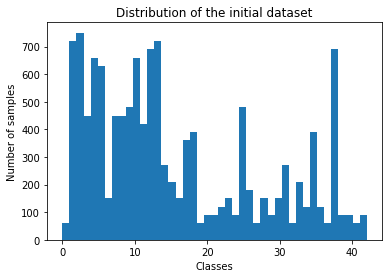

In [107]:
# Summary of the dataset:
plt.hist(y_test, bins = 43)
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.title("Distribution of the initial dataset")
plt.show()

### Include an exploratory visualization of the dataset

In [108]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

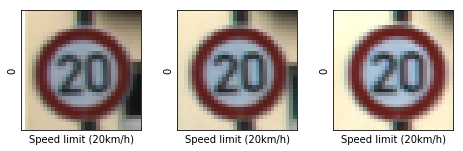

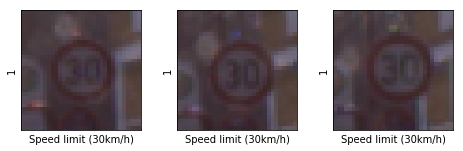

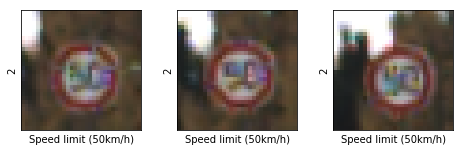

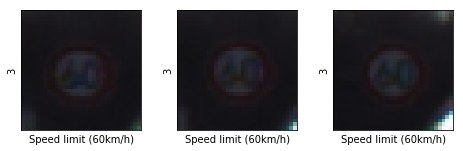

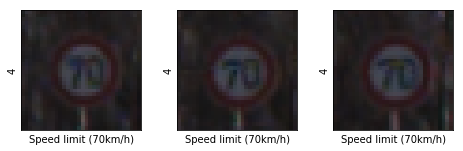

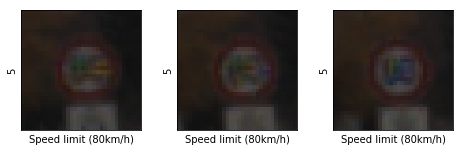

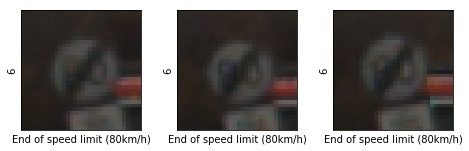

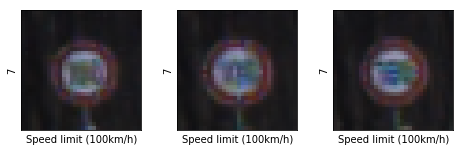

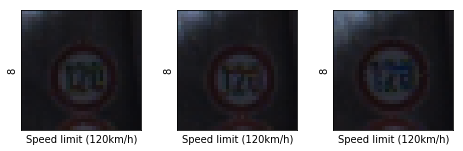

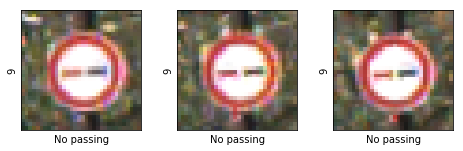

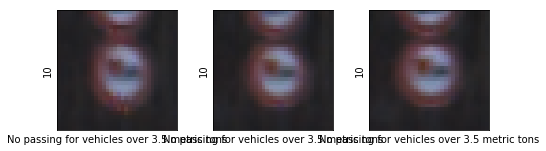

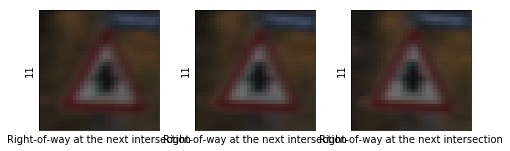

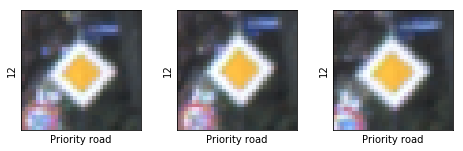

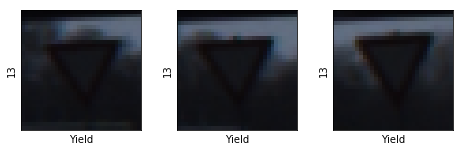

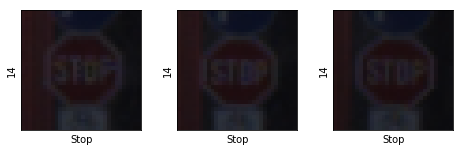

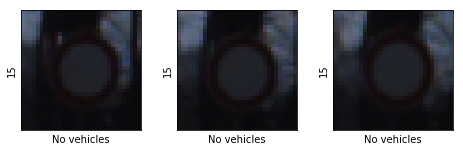

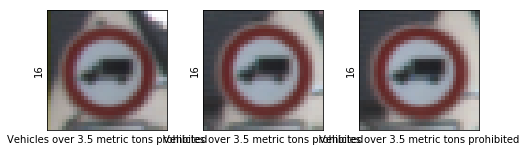

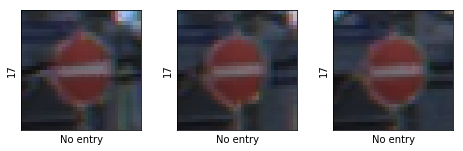

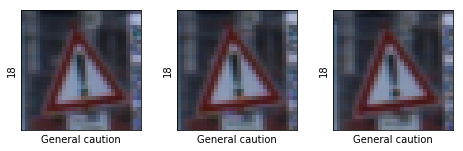

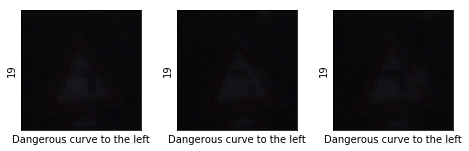

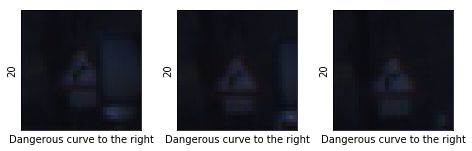

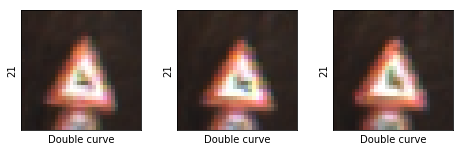

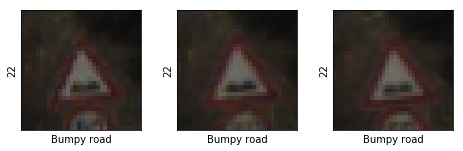

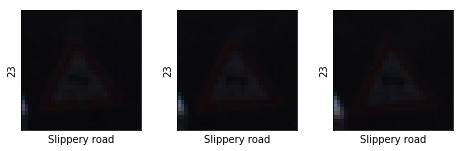

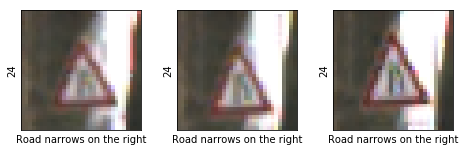

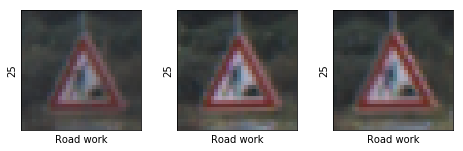

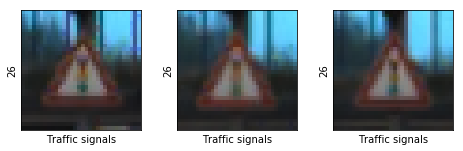

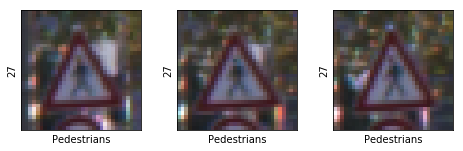

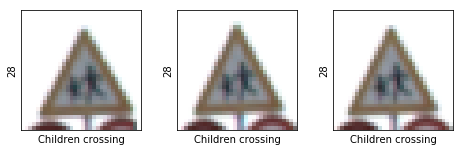

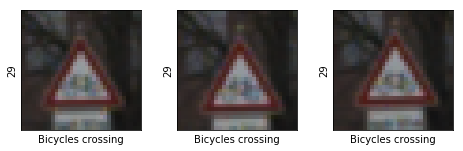

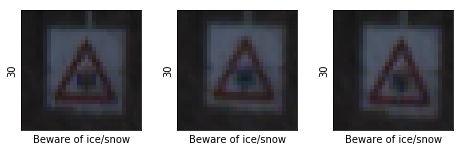

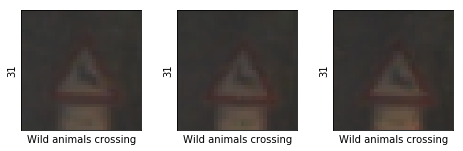

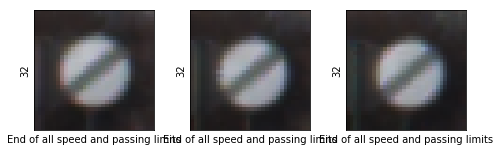

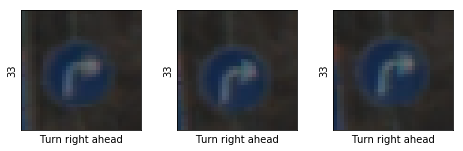

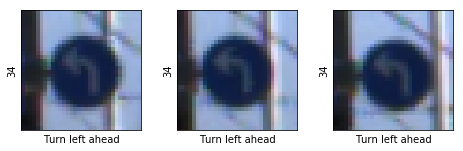

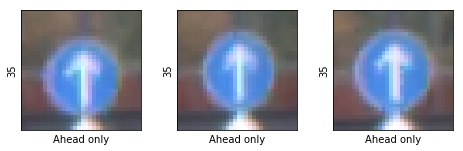

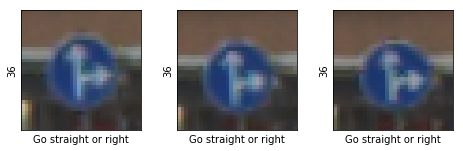

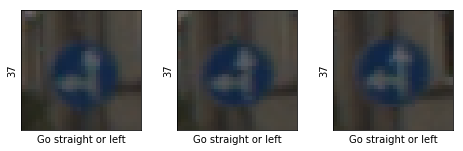

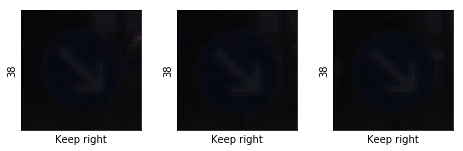

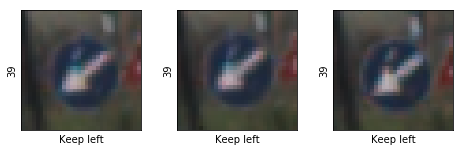

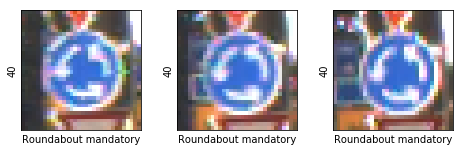

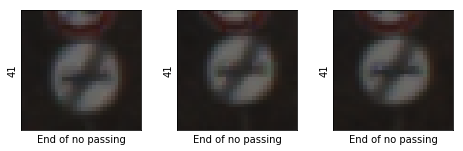

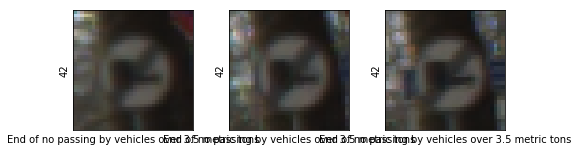

In [89]:
import matplotlib.gridspec as gridspec
for i in range(43):
    gs = gridspec.GridSpec(1, 3, top=1., bottom=0., right=1., left=0., hspace=0,
        wspace=0.3)
    
    for j in range(3):
        ax  = plt.subplot(gs[0,j])
        img = X_train[x[i,j]]
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(dictionary[str(i)])
        ax.set_ylabel(str(i))
    plt.show()
    

### Pre-process the Data Set (normalization, grayscale, etc.)

In [109]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import cv2

X_train2 = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
X_valid2 = np.zeros([X_valid.shape[0], X_valid.shape[1], X_valid.shape[2]])
X_test2 = np.zeros([X_test.shape[0],   X_test.shape[1],  X_test.shape[2]])

for i in range(len(X_train)):
    X_train2[i,:,:] = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_BGR2GRAY)    
    
for j in range(len(X_valid)):
    X_valid2[j,:,:] = cv2.cvtColor(X_valid[j,:,:,:], cv2.COLOR_BGR2GRAY)
    
for k in range(len(X_test)):
    X_test2[k,:,:] = cv2.cvtColor(X_test[k,:,:,:],cv2.COLOR_BGR2GRAY)
    
X_train = np.reshape(X_train2,(X_train2.shape[0],X_train2.shape[1],X_train2.shape[2],1))
X_valid = np.reshape(X_valid2,(X_valid2.shape[0],X_valid2.shape[1],X_valid2.shape[2],1))
X_test = np.reshape(X_test2,(X_test2.shape[0],X_test2.shape[1],X_test.shape[2],1))

X_train = (X_train-128)/128
X_valid = (X_valid-128)/128
X_test  = (X_test -128)/128
print(X_train.shape)
print("Done with the computation")

(34799, 32, 32, 1)
Done with the computation


In [110]:
import cv2
from cv2 import warpAffine

def method_to_translate (X,y,limit=100000):
    
    rows,cols, _ = X[0].shape
    j=0
    X2 = np.empty([len(X),32,32,1])
    y2 = np.empty([len(X)])
    for c in range(43):
        x = X[np.where(y==c)]  
        x_array = np.empty([ len(x) ,32, 32 , 1])
        y_array = np.empty([len(x)])
        if len(x)<limit:            
            for i in range(len(x)):
                M_translation = np.float32([[1,0,np.random.uniform(-5,5)],[0,1,np.random.uniform(-5,5)]])
                dst_translation = warpAffine(x[i,:,:,:], M_translation, (cols,rows))
                dst_translation = np.reshape(dst_translation, (1,32,32,1))
                x_array[i] = dst_translation
                y_array[i] = c
            X2[j:j+len(x),:,:,:] = x_array
            y2[j:j+len(x)]  = y_array
            j += len(x)
    return X2[:j,:,:,:],y2[:j]

def method_to_rotate (X, y, limit=100000):
    rows,cols, _ = X[0].shape
    X2 = np.empty([len(X),32,32,1])
    y2 = np.empty([len(X)])
    j=0
    for c in range(43):
        x = X[np.where(y==c)]
        x_array = np.empty([ len(x) , 32, 32 , 1])
        y_array = np.empty([ len(x) ])
        if len(x) < limit:
            for i in range(len(x)):
                angle = np.random.uniform(-20,20)
                M = cv2.getRotationMatrix2D((cols/2, rows/2),angle,1)
                dst_rotation = cv2.warpAffine(x[i,:,:,:], M, (cols,rows))
                dst_rotation = np.reshape(dst_rotation, (1,32,32,1))
                x_array[i] = dst_rotation
                y_array[i] = c
            X2[j:j+len(x),:,:,:] = x_array
            y2[j:j+len(x)]  = y_array
            j += len(x)    
    return X2[:j,:,:,:],y2[:j]

def method_to_affine(X, y,limit=100000):
    shear_range = 2
    rows,cols, _ = X[0].shape
    X2 = np.empty([len(X),32,32,1])
    y2 = np.empty([len(X)])
    j=0
    for c in range(43):
        x = X[np.where(y==c)]
        x_array = np.empty([ len(x) ,32, 32 , 1])
        y_array = np.empty([len(x)])
        if len(x)<limit:
            for i in range(len(x)):
                pts1 = np.float32([[5,5],[20,5],[5,20]])
                pt1  = 5+shear_range*np.random.uniform()-shear_range/2
                pt2  = 20+shear_range*np.random.uniform()-shear_range/2
                pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
                M = cv2.getAffineTransform(pts1, pts2)
                dst_rotation = cv2.warpAffine(x[i,:,:,:], M, (cols,rows))
                dst_rotation = np.reshape(dst_rotation, (1,32,32,1))
                x_array[i] = dst_rotation
                y_array[i] = c
            X2[j:j+len(x),:,:,:] = x_array
            y2[j:j+len(x)]  = y_array
            j += len(x)
    return X2[:j,:,:,:],y2[:j]

def method_translate_rotate_affine(X , y,limit=100000000):
    shear_range = 2
    rows,cols, _ = X[0].shape
    X2 = np.empty([len(X),32,32,1])
    y2 = np.empty([len(X)])
    j=0
    for c in range(43):
        x = X[np.where(y==c)]
        x_array = np.empty([ len(x) ,32, 32 , 1])
        y_array = np.empty([len(x)])
        if len(x)<limit:
            for i in range(len(x)):
                M_translation = np.float32([[1,0,np.random.uniform(-5,5)],[0,1,np.random.uniform(-5,5)]])
                dst_translation = warpAffine(x[i,:,:,:], M_translation, (cols,rows))
                angle = np.random.uniform(-20,20)
                M_rotation = cv2.getRotationMatrix2D((cols/2, rows/2),angle,1)
                dst_rotation = cv2.warpAffine(dst_translation, M_rotation, (cols,rows))
                
                pts1 = np.float32([[5,5],[20,5],[5,20]])
                pt1  = 5+shear_range*np.random.uniform()-shear_range/2
                pt2  = 20+shear_range*np.random.uniform()-shear_range/2
                pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
                M_shear = cv2.getAffineTransform(pts1, pts2)
                dst_shear = cv2.warpAffine(dst_rotation, M_shear, (cols,rows))
                dst_shear = np.reshape(dst_shear, (1,32,32,1))
                x_array[i] = dst_shear
                y_array[i] = c
            X2[j:j+len(x),:,:,:] = x_array
            y2[j:j+len(x)]  = y_array
            j += len(x)
    return X2[:j,:,:,:],y2[:j]
    

In [111]:
# Translation && Rotation && Shearing
def method1(X,y,limit):
    
    X1,y1 = method_to_translate(X, y, limit)
    X2,y2 = method_to_rotate(X, y, limit)
    print('Half way done')
    X = np.append(X,X1,axis=0)
    X = np.append(X,X2,axis=0)
    y = np.append(y,y1)
    y = np.append(y,y1)
    return X,y

def method(X,y, limit,p1,p2,p3):
    if(p1):
        X1,y1 = method_to_translate(X, y, limit)
        X = np.append(X,X1,axis=0)
        y = np.append(y,y1)
    if(p2):
        X2,y2 = method_to_rotate(X, y, limit)
        X = np.append(X,X2,axis=0)
        y = np.append(y,y2)
    if(p3):
        X3,y3 = method_to_affine(X, y, limit)
        X = np.append(X,X3,axis=0)
        y = np.append(y,y3)
        
    return X,y

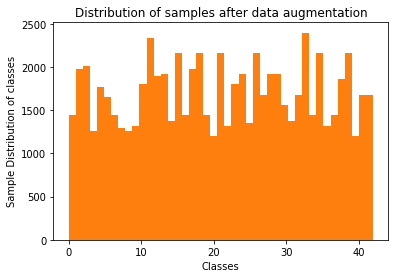

In [112]:
X_train,y_train = method( X_train, y_train, 500, 1,1,1)
X_train, y_train = method( X_train, y_train, 1200,0,0,1)
plt.hist(y_train, bins = 43)
X_train, y_train = method( X_train, y_train, 1200,0,0,1)
# X_test, y_test = method( X_test, y_test, 1250,0,1,0)
# X_test, y_test = method( X_test, y_test, 4000)
plt.hist(y_train ,bins=43)
plt.xlabel("Classes")
plt.ylabel("Sample Distribution of classes")
plt.title("Distribution of samples after data augmentation")
plt.show()

In [122]:
print(X_train.shape)

(73316, 32, 32, 1)


### Model Architecture

In [113]:
# Parameters
import tensorflow as tf
EPOCHS = 60
BATCH_SIZE = 128

In [114]:
def conv2d( x, W, b, strides =1):
    x = tf.nn.conv2d(x, W, strides = [1,strides,strides,1], padding = 'VALID')
    x = tf.nn.bias_add( x, b)
    return tf.nn.relu( x)

def maxpool2d( x, k=2 ):
    return tf.nn.max_pool( x, ksize=[1,k,k,1], strides=[1,k,k,1], padding='VALID')

### Train, Validate and Test the Model

In [115]:
from tensorflow.contrib.layers import flatten

def myNet(x):
    mu = 0          # mu is the mean
    sigma = 0.1     # sigma is the standard deviation
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma)),
        'wc3': tf.Variable(tf.truncated_normal(shape=(5,5,16,400),mean=mu, stddev = sigma)),
        'wfc1':tf.Variable(tf.truncated_normal(shape=(800,800), mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal((800,43), mean = mu, stddev = sigma))
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros([6])),
        'bc2': tf.Variable(tf.zeros([16])),
        'bc3': tf.Variable(tf.zeros([400])),
        'bfc1':tf.Variable(tf.zeros([800])),
        'out': tf.Variable(tf.zeros([43]))
    }
    
    conv1 = conv2d(x, weights['wc1'],biases['bc1'],1)
    conv1 = maxpool2d(conv1, 2)
    
    conv2 = conv2d(conv1, weights['wc2'],biases['bc2'],1)
    conv2 = maxpool2d(conv2, k=2)
    
    conv3 = conv2d(conv2, weights['wc3'],biases['bc3'],1)
    
    flattened1 = flatten(conv2)
    flattened2 = flatten(conv3)
    
    flattened = tf.concat( [ flattened1 , flattened2 ], 1)
    fc1 = tf.add(tf.matmul(flattened, weights['wfc1']),biases['bfc1'])
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])

    return logits

In [116]:
x = tf.placeholder(tf.float32, (None,32,32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,43)

rate = 0.001
logits = myNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels = one_hot_y, logits = logits )
loss_operation = tf.reduce_mean( cross_entropy )

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [117]:
correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(one_hot_y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

def evaluate (X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [118]:
saver = tf.train.Saver()
save_file = './model_final.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    X2, y2 = shuffle(X_train , y_train)
    
    for i in range(EPOCHS):
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X2[offset:end], y2[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate( X_valid, y_valid )
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess,save_file)
    

EPOCH 1 ...
Validation Accuracy = 0.885

EPOCH 2 ...
Validation Accuracy = 0.913

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.907

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.903

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 8 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.914

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.919

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 14 ...
Validation Accuracy = 0.912

EPOCH 15 ...
Validation Accuracy = 0.919

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.925

EPOCH 18 ...
Validation Accuracy = 0.916

EPOCH 19 ...
Validation Accuracy = 0.929

EPOCH 20 ...
Validation Accuracy = 0.915

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.935

EPOCH 24 ...
Validation Accuracy = 0.930

E

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

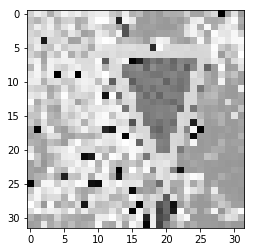

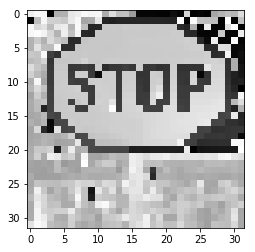

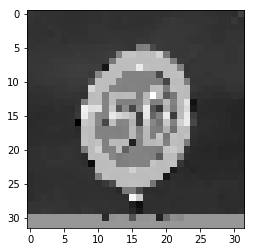

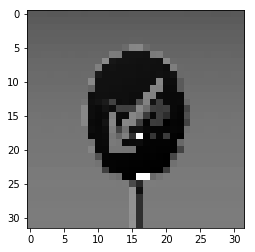

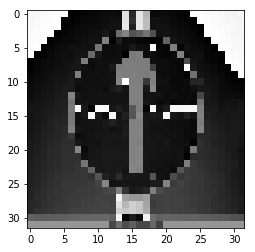

In [119]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2

image1 = mpimg.imread('../images/image1.jpg')
image2 = mpimg.imread('../images/image3.jpg')
image3 = mpimg.imread('../images/image4.jpg')
image4 = mpimg.imread('../images/image5.jpg')
image5 = mpimg.imread('../images/image6.jpg')

image1 = cv2.resize(image1, (32,32))
image2 = cv2.resize(image2,(32,32))
image3 = cv2.resize(image3, (32,32))
image4 = cv2.resize(image4,(32,32))
image5 = cv2.resize(image5,(32,32))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)   
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)   
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)   
image5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)   

image1 = (image1-128)/128
image2 = (image2-128)/128
image3 = (image3-128)/128
image4 = (image4-128)/128
image5 = (image5-128)/128

plt.imshow(image1,cmap = 'Greys_r')
plt.show()
plt.imshow(image2, cmap = 'Greys_r')
plt.show()
plt.imshow(image3, cmap = 'Greys_r')
plt.show()
plt.imshow(image4, cmap = 'Greys_r')
plt.show()
plt.imshow(image5, cmap = 'Greys_r')
plt.show()

x_check = np.zeros((5,32,32))
x_check[0] = image1
x_check[1] = image2
x_check[2] = image3
x_check[3] = image4
x_check[4] = image5

x_check = np.reshape(x_check, (5,32,32,1))
x_check = np.asarray(x_check, dtype = np.float32)
y_newImages = [13, 14, 2, 39, 35]
y_newImages = np.asarray(y_newImages, dtype = np.int32)

### Predict the Sign Type for Each Image

In [121]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

import tensorflow as tf
one_hot_y2 = tf.one_hot(y_newImages, 43)
one_hot_y_test = tf.one_hot(y_test,43)

with tf.Session() as sess:
    
    saver.restore(sess,save_file)
    logits2 = sess.run(logits, feed_dict={x: x_check})
    
    correct_prediction2 = tf.equal(tf.argmax(logits2,1),tf.argmax(one_hot_y2,1))

    print("The accuracy on the new set of images is: ",sess.run(tf.reduce_mean(tf.cast(correct_prediction2,tf.float32))))
    
    logitstest = sess.run(logits, feed_dict={x: X_test})
    correct_predictiontest = tf.equal(tf.argmax(logitstest,1),tf.argmax(one_hot_y_test,1))
    print("The accuracy on the test set of images is: ",sess.run(tf.reduce_mean(tf.cast(correct_predictiontest,tf.float32))))

INFO:tensorflow:Restoring parameters from ./model_final.ckpt
The accuracy on the new set of images is:  0.4
The accuracy on the test set of images is:  0.92304


### Analyze Performance

The performance was analyzed in the above cell. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [98]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
logits2 = tf.nn.softmax(logits2)
with tf.Session() as sess:
    logits2 = logits2.eval()
    b = np.partition(logits2,5)
    max5_probs = b[:,-5:]
    print(max5_probs)

[[ 0.02325581  0.02325581  0.02325581  0.02325581  0.02325582]
 [ 0.0232558   0.0232558   0.0232558   0.0232558   0.0232558 ]
 [ 0.0232558   0.0232558   0.0232558   0.02325629  0.0232558 ]
 [ 0.0232558   0.0232558   0.02325629  0.0232558   0.0232558 ]
 [ 0.0232558   0.0232558   0.02325629  0.0232558   0.0232558 ]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")